In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ethnicolr

Using TensorFlow backend.
/home/bossou/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/bossou/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/bossou/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/bossou/.local/lib/python3.6/site-packages/tensorflow/python

In [2]:
founders = pd.read_csv('all_founders.csv', dtype={"Number of News Articles": str})

fds = founders.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Full Name URL', 'Primary Organization URL', 
                     'Trend Score (7 Days)', 'Trend Score (30 Days)', 'Trend Score (90 Days)',
                     'Facebook', 'LinkedIn', 'Twitter', 
                     'Location', 'Regions', 'Biography', 'Number of News Articles', 
                     'Number of Founded Organizations', 'Number of Portfolio Companies', 
                     'Number of Lead Investments', 'Number of Exits',
                     'Number of Investments', 'Number of Partner Investments', 'Number of Events',
                     'CB Rank (Person)', 'Number of Exits (IPO)'], axis=1)
fds.head()

,Full Name,Primary Job Title,Primary Organization,First Name,Last Name,Gender
0,Jason Calacanis,Founder & CEO,Inside.com,Jason,Calacanis,Male
1,LeBron James,Co-Founder,PureBrands,LeBron,James,Male
2,Marc Benioff,Founder & Co-CEO,Salesforce,Marc,Benioff,Male
3,Serena Williams,Founder,Serena Williams Foundation,Serena,Williams,Female
4,Jeff Kearl,Co-Founder and CEO,Stance,Jeff,Kearl,Male


In [3]:
fds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63646 entries, 0 to 63645
Data columns (total 6 columns):
Full Name               63646 non-null object
Primary Job Title       63646 non-null object
Primary Organization    63646 non-null object
First Name              63646 non-null object
Last Name               63646 non-null object
Gender                  63447 non-null object
dtypes: object(6)
memory usage: 2.9+ MB


In [4]:
fds.isna().sum()

Full Name                 0
Primary Job Title         0
Primary Organization      0
First Name                0
Last Name                 0
Gender                  199
dtype: int64

In [5]:
fds = fds.dropna(subset=['Gender'])
fds.isna().sum()

Full Name               0
Primary Job Title       0
Primary Organization    0
First Name              0
Last Name               0
Gender                  0
dtype: int64

In [6]:
fds[fds['Gender'].str.contains('^(?!(Male|Female|Prefer not to identify)).*$', case=False)]

/home/bossou/.local/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Full Name,Primary Job Title,Primary Organization,First Name,Last Name,Gender
9861,Robyn Speer,"Chief Science Officer, Co-founder",Luminoso,Robyn,Speer,Transgender Woman
31478,Amir Khan,Founder and CEO,LendTech,Amir,Khan,Genderqueer
34387,Leila Khalil,"Founder, CEO",Lover.ly,Leila,Khalil,Bigender
39872,Kirsten Frisina,"CEO, Founder",VRClub Inc.,Kirsten,Frisina,Non-Binary
57927,Nicolas Partridge,Founder,LivNao Technologies Corp.,Nicolas,Partridge,Two-Spirit


In [7]:
fds.loc[fds['Gender'].str.contains('^(?!(Male|Female|Prefer not to identify)).*$', 
                                              case=False),'Gender'] = 'LGBT'

/home/bossou/.local/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [8]:
fds['Gender'].value_counts()

Male                      56125
Female                     7297
Prefer not to identify       20
LGBT                          5
Name: Gender, dtype: int64

In [9]:
fds = fds[fds['Gender'] != ('LGBT')]
fds = fds[fds['Gender'] != ('Prefer not to identify')]
fds['Gender'].value_counts(normalize=True)

Male      0.884945
Female    0.115055
Name: Gender, dtype: float64

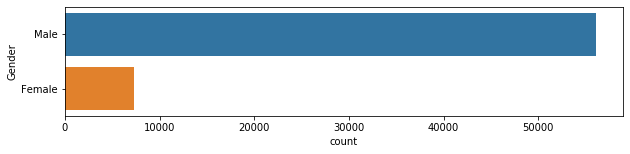

In [10]:
plt.figure(figsize=(10,2))
ax = sns.countplot(y='Gender', data=fds)
plt.show()

In [11]:
fds = fds[['Primary Organization', 'First Name', 'Last Name', 'Full Name', 
           'Primary Job Title', 'Gender']]
fds.head()

,Primary Organization,First Name,Last Name,Full Name,Primary Job Title,Gender
0,Inside.com,Jason,Calacanis,Jason Calacanis,Founder & CEO,Male
1,PureBrands,LeBron,James,LeBron James,Co-Founder,Male
2,Salesforce,Marc,Benioff,Marc Benioff,Founder & Co-CEO,Male
3,Serena Williams Foundation,Serena,Williams,Serena Williams,Founder,Female
4,Stance,Jeff,Kearl,Jeff Kearl,Co-Founder and CEO,Male


In [12]:
fds['Primary Job Title'].value_counts().nlargest(40)

Founder                                 7978
Co-Founder                              6092
Founder & CEO                           5984
Co-Founder & CEO                        2832
Founder and CEO                         2797
Co-founder                              1652
CEO & Founder                           1405
Co-Founder and CEO                      1346
CEO & Co-Founder                        1200
Co-Founder & CTO                         914
Co-founder & CEO                         755
Founder, CEO                             653
CEO and Founder                          636
CEO and Co-Founder                       553
Founder & Chief Executive Officer        528
Co-Founder and CTO                       494
Co-Founder & Chief Executive Officer     482
Founder & CTO                            470
Co Founder                               409
Co-founder and CEO                       409
Co-Founder, CEO                          408
Co-Founder & COO                         402
CEO & Co-f

In [13]:
fds.loc[fds['Primary Job Title'].str.contains('^founder$|^co\s*-*\s*founder$', 
                                              case=False),'Primary Job Title'] = 'Founder Only'
fds.loc[fds['Primary Job Title'].str.contains('owner', 
                                              case=False),'Primary Job Title'] = 'Founder & Owner'
fds.loc[fds['Primary Job Title'].str.contains('ceo|chief executive officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CEO'
fds.loc[fds['Primary Job Title'].str.contains('president', 
                                              case=False),'Primary Job Title'] = 'Founder & President'
fds.loc[fds['Primary Job Title'].str.contains('chairman', 
                                              case=False),'Primary Job Title'] = 'Founder & Chairman'
fds.loc[fds['Primary Job Title'].str.contains('cto|chief technology officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CTO'
fds.loc[fds['Primary Job Title'].str.contains('cbo|chief business officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CBO'
fds.loc[fds['Primary Job Title'].str.contains('coo|chief operating officer', 
                                              case=False),'Primary Job Title'] = 'Founder & COO'
fds.loc[fds['Primary Job Title'].str.contains('cfo|chief financial officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CFO'
fds.loc[fds['Primary Job Title'].str.contains('cpo|chief product officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CPO'
fds.loc[fds['Primary Job Title'].str.contains('CSO', 
                                              case=True),'Primary Job Title'] = 'Founder & CSO'
fds.loc[fds['Primary Job Title'].str.contains('cmo|chief marketing officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CMO'
fds.loc[fds['Primary Job Title'].str.contains('cco|chief creative officer', 
                                              case=False),'Primary Job Title'] = 'Founder & CCO'
fds.loc[fds['Primary Job Title'].str.contains('partner', 
                                              case=False),'Primary Job Title'] = 'Founder & Partner'
fds.loc[fds['Primary Job Title'].str.contains('^MD|\sMD', 
                                              case=True),'Primary Job Title'] = 'Founder & MD'
fds.loc[fds['Primary Job Title'].str.contains('CIO', 
                                              case=True),'Primary Job Title'] = 'Founder & CIO'
fds.loc[fds['Primary Job Title'].str.contains('CRO', 
                                              case=True),'Primary Job Title'] = 'Founder & CRO'

In [14]:
fds['Primary Job Title'].value_counts().nlargest(40)

Founder & CEO                              26223
Founder Only                               16483
Founder & CTO                               7191
Founder & COO                               2020
Founder & President                         1853
Founder & Partner                           1699
Founder & Chairman                          1062
Founder & CPO                                474
Founder & CMO                                426
Founder & CFO                                300
Founder & CSO                                211
Founder & CCO                                181
Founder & Owner                              164
Founder & MD                                  95
Founder & CIO                                 87
Founder & CRO                                 54
Founder & CBO                                 48
Co-Founder & Head of Product                  25
Co-Founder & Chief Scientist                  25
Co-Founder & Chief Strategy Officer           21
Co-Founder and Chief

In [15]:
fds.loc[fds['Primary Job Title'].str.contains
        ('^(?!(Founder Only|Founder & Owner|Founder & CEO|Founder & President|Founder & Chairman|Founder & CTO|Founder & CBO|Founder & COO|Founder & CFO|Founder & CPO|Founder & CSO|Founder & CMO|Founder & CCO|Founder & Partner|Founder & MD|Founder & CIO|Founder & CRO)$)', 
        case=False),'Primary Job Title'] = 'Other Founders'

/home/bossou/.local/lib/python3.6/site-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [16]:
fds['Primary Job Title'].value_counts().nlargest(25)

Founder & CEO          26223
Founder Only           16483
Founder & CTO           7191
Other Founders          4851
Founder & COO           2020
Founder & President     1853
Founder & Partner       1699
Founder & Chairman      1062
Founder & CPO            474
Founder & CMO            426
Founder & CFO            300
Founder & CSO            211
Founder & CCO            181
Founder & Owner          164
Founder & MD              95
Founder & CIO             87
Founder & CRO             54
Founder & CBO             48
Name: Primary Job Title, dtype: int64

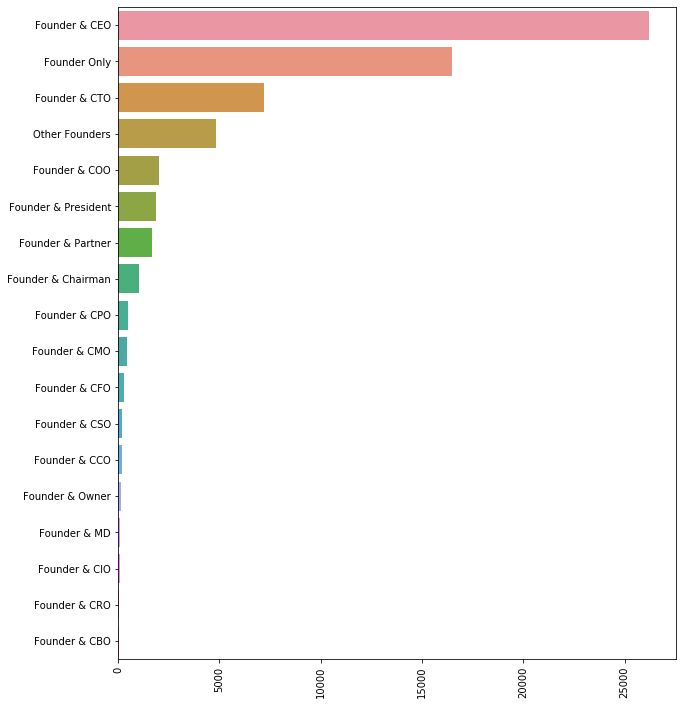

In [17]:
job_title_counts = fds['Primary Job Title'].value_counts().nlargest(25)
plt.figure(figsize=(10,12))
rg = sns.barplot(y=job_title_counts.index, x=job_title_counts.values)
plt.setp(rg.get_xticklabels(), rotation=90)
plt.show()

In [18]:
fds = ethnicolr.pred_fl_reg_name(fds, 'Last Name', 'First Name')

In [19]:
fds.head(20)

,Primary Organization,First Name,Last Name,Full Name,Primary Job Title,Gender,race,asian,hispanic,nh_black,nh_white
0,Inside.com,Jason,Calacanis,Jason Calacanis,Founder & CEO,Male,nh_white,0.005740,0.023381,0.011664,0.959215
1,PureBrands,LeBron,James,LeBron James,Founder Only,Male,nh_black,0.002246,0.002990,0.516899,0.477865
2,Salesforce,Marc,Benioff,Marc Benioff,Founder & CEO,Male,nh_white,0.001964,0.011785,0.004625,0.981626
3,Serena Williams Foundation,Serena,Williams,Serena Williams,Founder Only,Female,nh_black,0.009929,0.018609,0.641866,0.329596
4,Stance,Jeff,Kearl,Jeff Kearl,Founder & CEO,Male,nh_white,0.010500,0.001648,0.065023,0.922828
5,MakeSpace,Rahul,Gandhi,Rahul Gandhi,Founder & CEO,Male,asian,0.948697,0.004118,0.011260,0.035924
6,Huawei Technologies,Ren,Zhengfei,Ren Zhengfei,Founder & CEO,Male,nh_white,0.392516,0.025797,0.012750,0.568937
7,Overbrook Entertainment,Will,Smith,Will Smith,Founder Only,Male,nh_white,0.002333,0.002635,0.338951,0.656082
8,Moderne Ventures,Constance,Freedman,Constance Freedman,Founder & Partner,Female,nh_white,0.004518,0.006793,0.035739,0.952951
9,SoftBank,Masayoshi,Son,Masayoshi Son,Founder & CEO,Male,asian,0.974197,0.004192,0.006382,0.015229


In [20]:
fds = fds.drop(['asian', 'hispanic', 'nh_white', 'nh_black'], axis=1)

In [21]:
fds.rename(columns={'race': 'Race', 'Primary Organization': 'Organization', 
                    'Primary Job Title': 'Job Title'}, inplace=True)

In [22]:
fds['Race'] = fds['Race'].replace(['asian'], 'Asian')
fds['Race'] = fds['Race'].replace(['nh_white'], 'White')
fds['Race'] = fds['Race'].replace(['nh_black'], 'Black')
fds['Race'] = fds['Race'].replace(['hispanic'], 'Hispanic')

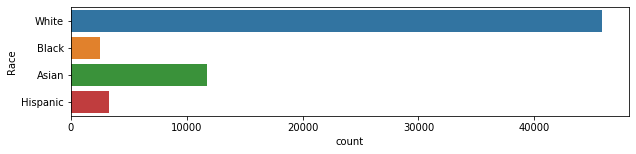

In [23]:
plt.figure(figsize=(10,2))
ax = sns.countplot(y='Race', data=fds)
plt.show()

In [24]:
fds['Race'].value_counts()

White       45882
Asian       11765
Hispanic     3278
Black        2497
Name: Race, dtype: int64

In [25]:
fds

,Organization,First Name,Last Name,Full Name,Job Title,Gender,Race
0,Inside.com,Jason,Calacanis,Jason Calacanis,Founder & CEO,Male,White
1,PureBrands,LeBron,James,LeBron James,Founder Only,Male,Black
2,Salesforce,Marc,Benioff,Marc Benioff,Founder & CEO,Male,White
3,Serena Williams Foundation,Serena,Williams,Serena Williams,Founder Only,Female,Black
4,Stance,Jeff,Kearl,Jeff Kearl,Founder & CEO,Male,White
5,MakeSpace,Rahul,Gandhi,Rahul Gandhi,Founder & CEO,Male,Asian
6,Huawei Technologies,Ren,Zhengfei,Ren Zhengfei,Founder & CEO,Male,White
7,Overbrook Entertainment,Will,Smith,Will Smith,Founder Only,Male,White
8,Moderne Ventures,Constance,Freedman,Constance Freedman,Founder & Partner,Female,White
9,SoftBank,Masayoshi,Son,Masayoshi Son,Founder & CEO,Male,Asian


### Grouping founders by organization

In [26]:
grouped_by_organization = fds.groupby(['Organization'])
result = [g[1] for g in list(grouped_by_organization)[:3]]

In [27]:
cps = pd.DataFrame()
for organization, group in grouped_by_organization:
    group = group.reset_index(drop=True)
    names = []
    job_titles = []
    genders = []
    group_gender = []
    races = []
    group_race = []
    n = len(group)
    if n == 1:
        names = group.loc[0, 'Full Name']
        job_titles = group.loc[0, 'Job Title']
        genders = group.loc[0, 'Gender']
        races = group.loc[0, 'Race']
        if genders == 'Male':
            group_gender = 'Male only'
        else:
            group_gender = 'Female only'
        
        if races == 'Hispanic':
            group_race = 'Hispanic Only'
        if races == 'Black':
            group_race = 'Black Only'
        if races == 'Asian':
            group_race = 'Asian Only'
        if races == 'White':
            group_race = 'White Only'   
        
        cps = cps.append({'Organization': organization, 'Names': names, 'Job Titles': job_titles,
                        'Genders': genders, 'Group Gender': group_gender, 
                          'Races': races, 'Group Race': group_race}, 
                        ignore_index=True)
     
            
    else:
        for i in range(len(group)):
            names.append(group.loc[i, 'Full Name'])
            job_titles.append(group.loc[i, 'Job Title'])
            genders.append(group.loc[i, 'Gender'])
            races.append(group.loc[i, 'Race'])
            
        if len(genders) == genders.count(genders[0]):
            if genders[0] == 'Male':
                group_gender = 'Male only'
            else:
                group_gender = 'Female only'
        else:
            group_gender = 'Mixed'       
            
        if len(races) == races.count(races[0]):
            if races[0] == 'Hispanic':
                group_race = 'Hispanic Only'
            if races[0] == 'Black':
                group_race = 'Black Only'
            if races[0] == 'Asian':
                group_race = 'Asian Only'
            if races[0] == 'White':
                group_race = 'White Only'
        else:
            group_race = 'Mixed'      

        cps = cps.append({'Organization': organization, 'Names': names, 
                          'Job Titles': job_titles,'Genders': genders, 
                          'Group Gender': group_gender, 'Races': races, 
                          'Group Race': group_race}, ignore_index=True)
            
            
#         cps = cps.append({'Organization': organization, 'Names': ', '.join(names), 
#                           'Job Titles': ', '.join(job_titles),
#                           'Genders': ', '.join(map(str, genders)), 'Group Gender': group_gender, 
#                           'Races': races, 'Group Race': group_race}, ignore_index=True)

In [28]:
cps = cps[['Organization', 'Names', 'Job Titles', 'Genders', 'Group Gender', 'Races', 'Group Race']]

In [29]:
cps.head()

,Organization,Names,Job Titles,Genders,Group Gender,Races,Group Race
0,#paid,"[Adam Rivietz, Bryan Gold]","[Founder & CSO, Founder & CEO]","[Male, Male]",Male only,"[White, White]",White Only
1,$Guap Coin,Tavonia Evans,Founder & CEO,Female,Female only,Black,Black Only
2,&pizza,Michael Lastoria,Founder & CEO,Male,Male only,White,White Only
3,'Rock' Your Paper,Nadeera Nilupamali,Founder Only,Female,Female only,Asian,Asian Only
4,*faircompanies,Kirsten Dirksen,Founder & CTO,Female,Female only,White,White Only


In [30]:
cps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47253 entries, 0 to 47252
Data columns (total 7 columns):
Organization    47253 non-null object
Names           47253 non-null object
Job Titles      47253 non-null object
Genders         47253 non-null object
Group Gender    47253 non-null object
Races           47253 non-null object
Group Race      47253 non-null object
dtypes: object(7)
memory usage: 2.5+ MB


### Gender

In [31]:
cps['Group Gender'].value_counts()

Male only      40496
Female only     4700
Mixed           2057
Name: Group Gender, dtype: int64

In [32]:
cps['Group Gender'].value_counts(normalize=True)

Male only      0.857004
Female only    0.099465
Mixed          0.043532
Name: Group Gender, dtype: float64

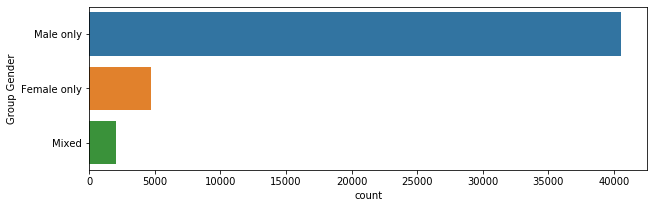

In [33]:
plt.figure(figsize=(10,3))
ax1 = sns.countplot(y='Group Gender', data=cps)
plt.show()

### Race

In [34]:
cps['Group Race'].value_counts()

White Only       32535
Asian Only        7397
Mixed             3835
Hispanic Only     2014
Black Only        1472
Name: Group Race, dtype: int64

In [35]:
cps['Group Race'].value_counts(normalize=True)

White Only       0.688528
Asian Only       0.156540
Mixed            0.081159
Hispanic Only    0.042622
Black Only       0.031151
Name: Group Race, dtype: float64

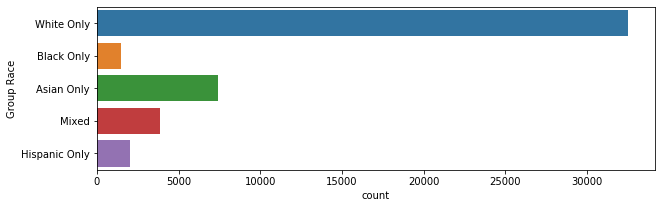

In [36]:
plt.figure(figsize=(10,3))
ax1 = sns.countplot(y='Group Race', data=cps)
plt.show()

### Merge

In [37]:
companies = pd.read_csv('all_companies.csv')
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 60 columns):
Organization Name                         30000 non-null object
Organization Name URL                     30000 non-null object
Categories                                29953 non-null object
Headquarters Location                     29917 non-null object
Description                               30000 non-null object
CB Rank (Company)                         30000 non-null object
Headquarters Regions                      27853 non-null object
Estimated Revenue Range                   12077 non-null object
Operating Status                          30000 non-null object
Founded Date                              28997 non-null object
Founded Date Precision                    28997 non-null object
Exit Date                                 6059 non-null object
Exit Date Precision                       6059 non-null object
Closed Date                               311 non-null object

In [38]:
cps_fds = pd.merge(companies, cps,  how='left', left_on=['Organization Name'], right_on = ['Organization'])

In [39]:
cps_fds.to_csv('final_dataset.csv')

In [40]:
cps_fds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 67 columns):
Organization Name                         30000 non-null object
Organization Name URL                     30000 non-null object
Categories                                29953 non-null object
Headquarters Location                     29917 non-null object
Description                               30000 non-null object
CB Rank (Company)                         30000 non-null object
Headquarters Regions                      27853 non-null object
Estimated Revenue Range                   12077 non-null object
Operating Status                          30000 non-null object
Founded Date                              28997 non-null object
Founded Date Precision                    28997 non-null object
Exit Date                                 6059 non-null object
Exit Date Precision                       6059 non-null object
Closed Date                               311 non-null object

In [41]:
cps_fds.head()

,Organization Name,Organization Name URL,Categories,Headquarters Location,Description,CB Rank (Company),Headquarters Regions,Estimated Revenue Range,Operating Status,Founded Date,...,Aberdeen - IT Spend,Aberdeen - IT Spend Currency,Aberdeen - IT Spend Currency (in USD),Organization,Names,Job Titles,Genders,Group Gender,Races,Group Race
0,Techstars,https://www.crunchbase.com/organization/techstars,"Finance, Financial Services, Venture Capital","Boulder, Colorado, United States",Techstars is the worldwide network that helps ...,1,"Greater Denver Area, Western US",$1M to $10M,Active,2006-10-01,...,169113.0,USD,169113.0,Techstars,"[Jared Polis, David Brown, David Cohen, Ted Se...","[Founder Only, Founder & CEO, Founder & CEO, F...","[Male, Male, Male, Male]",Male only,"[White, White, White, White]",White Only
1,Instagram,https://www.crunchbase.com/organization/instagram,"Mobile, Photo Sharing, Photography, Social Media","Menlo Park, California, United States",Instagram is a free photo sharing application ...,2,"San Francisco Bay Area, Silicon Valley, West C...",NaN,Active,2010-10-06,...,NaN,NaN,NaN,Instagram,Kevin Systrom,Founder & CEO,Male,Male only,White,White Only
2,Beyond Meat,https://www.crunchbase.com/organization/beyond...,"Food and Beverage, Food Processing, Health Care","Manhattan Beach, California, United States",Beyond Meat is planting The Future of Protein.,3,"Greater Los Angeles Area, West Coast, Western US",$10M to $50M,Active,2009-01-01,...,265927.0,USD,265927.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Xiaomi,https://www.crunchbase.com/organization/xiaomi,"Consumer Electronics, Internet, Mobile","Beijing, Beijing, China",Xiaomi is an electronics and software company ...,4,Asia-Pacific (APAC),NaN,Active,2010-04-04,...,NaN,NaN,NaN,Xiaomi,"[Jun Lei, Bin Lin, Kong-Kat Wong, Feng Hong, D...","[Founder & CEO, Founder & President, Founder &...","[Male, Male, Male, Male, Male, Male, Male]",Male only,"[Asian, Asian, Asian, Asian, Asian, Asian, Asian]",Asian Only
4,Uber,https://www.crunchbase.com/organization/uber,"Customer Service, Mobile Apps, Public Transpor...","San Francisco, California, United States","Uber develops, markets, and operates a ride-sh...",5,"San Francisco Bay Area, West Coast, Western US",$10B+,Active,2009-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
